# **_Predict Customer Personality to Boost Marketing Campaign_**

By: Bintang Sirius

---

**Table of Content:**
- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model

# **Introduction**

**Background**<br>
Sebuah perusahaan dapat berkembang dengan pesat saat mengetahui customer personality nya, sehingga dapat memberikan layanan serta manfaat lebih baik kepada pelanggan yang berpotensi menjadi pelanggan yang loyal. Dengan mengolah data historis marketing campaign, dapat menaikkan performa dan menyasar pelanggan yang tepat agar dapat bertransaksi di platform perusahaan. Dari insight data tersebut, difokuskan membuat sebuah model prediksi kluster sehingga memudahkan perusahaan dalam membuat keputusan.

**Goal**<br>
Tujuan dari analisis profil dan perilaku pelanggan dengan pendekatan clustering adalah untuk memahami pelanggan dengan lebih baik, menyediakan layanan yang lebih personal, meningkatkan performa penjualan, dan membangun hubungan yang kuat dengan pelanggan. <br>

**Objective**<br>
- Membuat model mechine learning yang dapat mengelompokkan pelanggan ke segmen-segmen berbeda berdasar karakteristiknya.
- Mengekstraksi _insight_ mendalam tentang profil dan perilaku pelanggan.
- Menentukan strategi bisnis yang efektif dari hasil _clustering_.

**Business Matric**: _Conversion Rate_

**Deskripsi Fitur**

Feature | Descriptions
--------|-------------
`ID` | ID unik dari setiap pelanggan
`Year_Birth` | Tahun kelahiran pelanggan
`Complain` | Bernilai 1 jika pelanggan komplain dalam 2 tahun terakhir
`Dt_Customer` | Tanggal pendaftaran pelanggan dengan perusahaan (gabung member)
`Education` | Tingkat pendidikan pelanggan
`Marital_Status` | Status pernikahan pelanggan
`Kidhome` | Jumlah anak kecil dalam rumah tangga pelanggan
`Teenhome` |  Jumlah remaja dalam rumah tangga pelanggan
`Income` | Pendapatan rumah tangga pelanggan per tahun
`MntFishProducts` | Jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir
`MntMeatProducts` | Jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir
`MntFruits` | Jumlah yang dibelanjakan untuk produk buah-buahan dalam 2 tahun terakhir
`MntSweetProducts` | Jumlah yang dibelanjakan untuk produk manis dalam 2 tahun terakhir
`MntWines` | Jumlah yang dibelanjakan untuk produk anggur dalam 2 tahun terakhir
`MntGoldProds` | Jumlah yang dibelanjakan untuk produk emas dalam 2 tahun terakhir
`NumDealsPurchases` | Jumlah pembelian yang dilakukan dengan diskon
`NumCatalogPurchases`| Jumlah pembelian dengan katalog (membeli barang yang akan dikirim melalui pos)
`NumStorePurchases` | Jumlah pembelian langsung di toko
`NumWebPurchases` | Jumlah pembelian melalui situs web perusahaan
`NumWebVisitsMonth` | Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir
`Recency` | Jumlah hari sejak pembelian terakhir
`Response` | Bernilai 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

# **Import Library and Load + Overview Dataset**

## Import Library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

In [2]:
color =  ['steelblue', 'indianred', 'grey', 'orange', 'olive']

## Load Dataset

In [3]:
df = pd.read_csv('marketing_campaign_data.csv')

In [4]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
189,189,6431,1964,S3,Menikah,45759000.0,1,1,2/23/2013,13,...,7,0,0,0,0,0,0,3,11,0
1717,1717,7629,1977,S1,Menikah,22108000.0,1,1,5/8/2014,46,...,7,0,0,0,0,0,0,3,11,0
517,517,10203,1990,S1,Lajang,26095000.0,1,0,6/30/2013,77,...,7,0,0,0,0,0,0,3,11,0
1499,1499,6318,1988,S1,Menikah,68487000.0,0,0,1/13/2013,48,...,4,0,0,0,0,0,0,3,11,0
629,629,5063,1977,S1,Lajang,28769000.0,1,0,12/18/2012,76,...,9,0,0,0,0,0,0,3,11,0


## Overview Dataset

In [5]:
df.shape

(2240, 30)

In [6]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.00,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.00,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.00,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.00,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.07,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.00,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.00,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.00,663,"[9/4/2012, 3/8/2014, 8/21/2013, 2/10/2014, 1/1..."
9,Recency,int64,0,0.00,100,"[58, 38, 26, 94, 16]"


In [7]:
df.duplicated().sum()

0

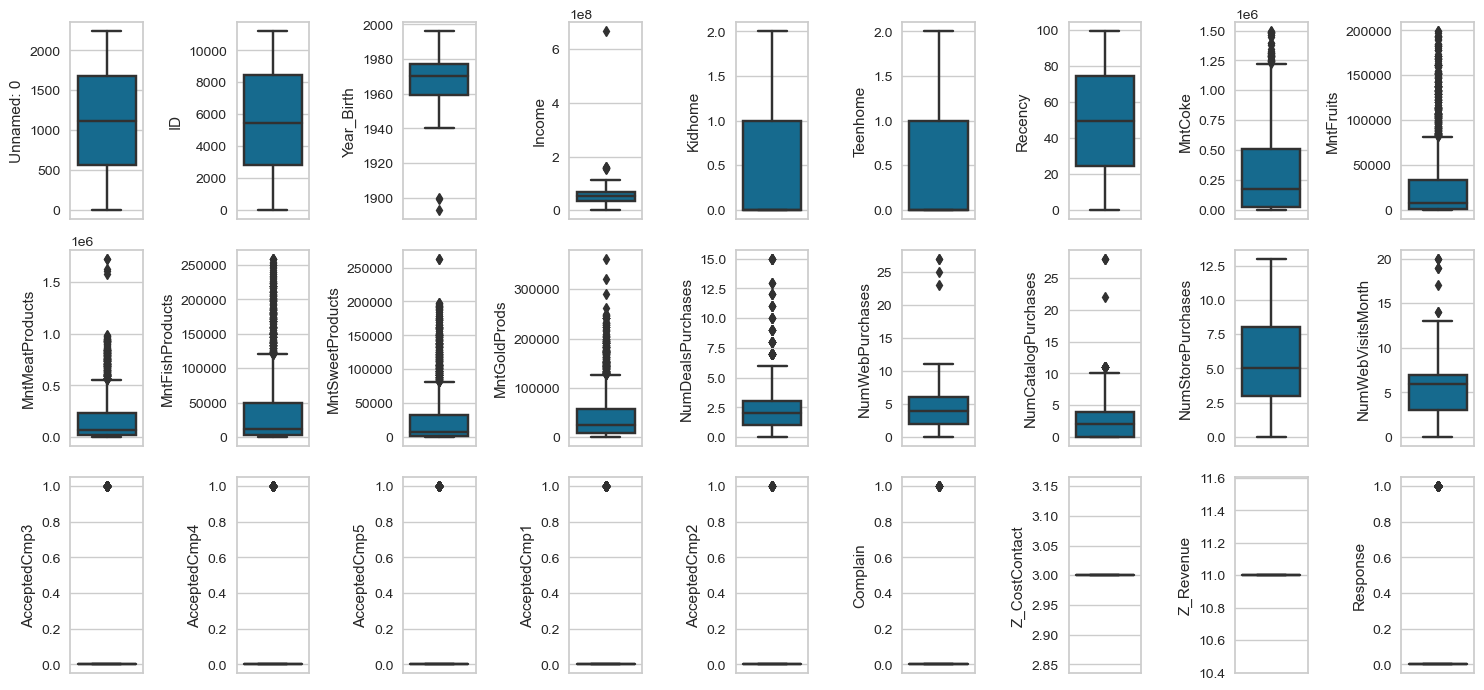

In [8]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Dataset ini terdiri dari **30 _feature_** dan **2240 baris**, dengan _missing value_ yang terdapat pada fitur **`Income`** dan tidak ada data yang duplikat. Secara keseluruhan data cenderung memiliki outlier. Terlihat **nilai ekstrim** pada fitur `Income` dan `Year_Birth`

Pada tahap EDA nanti, akan dilakukan analisis konversi _rate_. Analisis konversi _rate_ ini bertujuan untuk mencari wawasan dari data persentase pengunjung sebuah situs web dan tindakan apa yang mereka lakukan selama mengunjungi situs tersebut, serta apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama kunjungan di situs web tersebut.

Sebelum melakukan analisis konversi rate, dilakukan proses pembersihan data (_data cleaning_) dan pengembangan fitur (_feature engineering_) pada variabel data yang ada. Hal ini dilakukan untuk menghasilkan sebuah kolom baru yang disebut Conversion rate, serta beberapa kolom fitur lain seperti umur, penghasilan, pengeluaran, dan sebagainya. Dengan adanya _feature-feature_ ini, diharapkan dapat menemukan pola perilaku konsumen yang dapat memberikan informasi berharga dalam analisis konversi _rate_.

# **Data Cleaning**

In [9]:
df1 = df.copy()

In [10]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Handling Outlier

In [11]:
# indexYB = df1[(df['Year_Birth'] < 1920) ].index
# df1.drop(indexYB , inplace=True)

# indexInc = df1[(df['Income'] > 150000000) ].index
# df1.drop(indexInc , inplace=True)

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1840


Hasil sesudah dilakukan handling outlier.

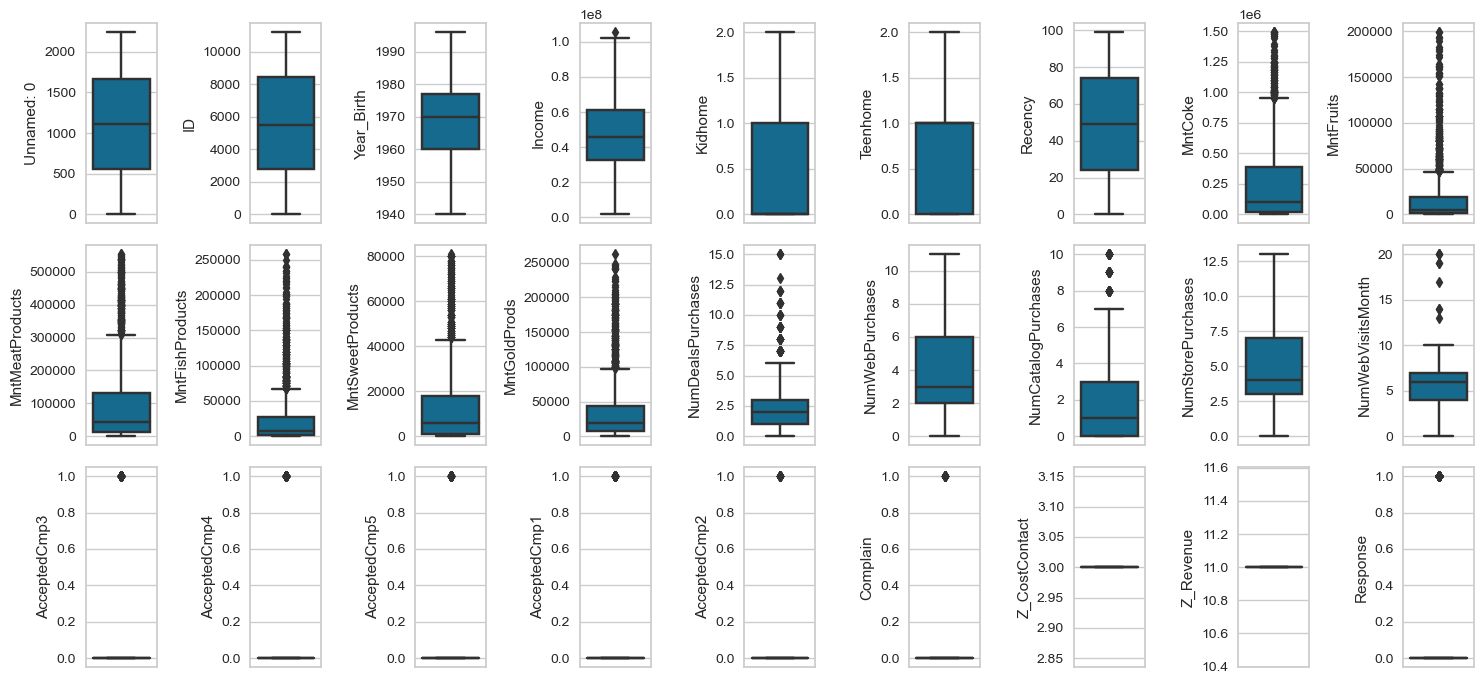

In [13]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

## Handling Missing Value
Handling missing value dilakukan dengan imputasi nilai median (robust)

In [14]:
df1.fillna(df1['Income'].median(), inplace=True)

In [15]:
df1.isna().sum().sum()

0

# **Feature Engineering**

## Membership Duration
Membuat fitur durasi membership dari fitur `Dt_Customer`

In [16]:
# konversi ke datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# membuat kolom baru durasi membership
# ------------------------------------------------------------
df1['Membership_Duration'] = 2023 - df1['Dt_Customer'].dt.year

In [17]:
df1['Membership_Duration'].value_counts()

Membership_Duration
10    975
9     471
11    394
Name: count, dtype: int64

## Customer Age
Usia pelanggan dapat diekstraksi dari fitur `Year_Birth`

In [18]:
# menambahkan kolom usia
df1['Age'] = 2023 - df1['Year_Birth']

In [19]:
print(f'min age: {df1.Age.min()}')
print(f'max age: {df1.Age.max()}')

min age: 27
max age: 83


In [20]:
# mengkategorikan berdasarkan usia
df1['Age_Categories'] = np.where(df1['Age'] < 40, 'Young Adult',
                      np.where(df1['Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

In [21]:
df1['Age_Categories'].value_counts()

Age_Categories
Middle-Aged Adult    1038
Old Adult             597
Young Adult           205
Name: count, dtype: int64

## Total Children
Fitur ini merepresentasikan jumlah anak yang dimiliki oleh pelanggan

In [22]:
# total anak
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

In [23]:
df1['Total_Children'].value_counts()

Total_Children
1    1027
2     405
0     359
3      49
Name: count, dtype: int64

## Total Transaction
Fitur ini merepresentasikan total keseluruhan transaksi yang telah dilakukan oleh pelanggan.

In [24]:
df1['Total_Transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [25]:
df1['Total_Transaction'].value_counts()

Total_Transaction
7     148
5     143
4     124
6     122
9     100
8      93
17     89
16     81
10     78
21     69
12     68
20     67
11     64
15     61
23     59
19     59
22     56
18     53
14     47
25     44
26     43
13     40
24     35
27     27
28     25
32     11
31      9
29      8
30      7
2       2
1       2
0       2
34      2
35      1
33      1
Name: count, dtype: int64

## Total Spending
Fitur ini merepresentasikan total pengeluaran pelanggan dari keseluruhan pembelian yang telah dilakukan.

In [26]:
df1['Total_Spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

In [27]:
df1['Total_Spending'].value_counts()

Total_Spending
46000      18
22000      17
57000      16
44000      15
55000      15
           ..
683000      1
605000      1
779000      1
1829000     1
843000      1
Name: count, Length: 808, dtype: int64

## Total Accepted Campaign
Fitur ini merepresentasikan total campaign yang diterima oleh pelanggan secara keseluruhan.

In [28]:
df1['Total_Accepted_Campaign'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [29]:
df1['Total_Accepted_Campaign'].value_counts()

Total_Accepted_Campaign
0    1520
1     245
2      53
3      15
4       7
Name: count, dtype: int64

## Conversion Rate
Conversion Rate = (total transaction/total web visit)*100

In [30]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1['CVR'] = round(df1.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

In [31]:
df1['CVR'].value_counts()

CVR
1.00    120
2.00     61
0.71     42
4.00     42
3.00     42
       ... 
0.05      1
9.67      1
5.80      1
5.83      1
3.38      1
Name: count, Length: 165, dtype: int64

# **Exploratory Data Analysis**

In [32]:
df2 = df1.copy()

## Numerical Feature

In [33]:
nums = df2.loc[:, (df2.dtypes == 'int64') | (df2.dtypes == float)].columns.tolist()
nums = nums[3:]
print(nums)
print(len(nums))

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']
30


## Categorical Fearure

In [34]:
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

['Education', 'Marital_Status', 'Age_Categories']


## Statistical Summary

In [35]:
n_feats = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']

In [36]:
df2[n_feats].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,1840.0,46945913.59,18665446.62,1730000.0,32892000.00,46014500.0,61297250.0,105471000.0
Recency,1840.0,48.55,28.91,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1840.0,9.96,0.68,9.0,9.00,10.0,10.0,11.0
Age,1840.0,53.98,11.48,27.0,46.00,53.0,63.0,83.0
Total_Children,1840.0,1.08,0.72,0.0,1.00,1.0,1.0,3.0
Total_Transaction,1840.0,13.58,7.42,0.0,7.00,12.0,20.0,35.0
Total_Spending,1840.0,441633.15,478203.10,5000.0,57000.00,231500.0,735250.0,2231000.0
Total_Accepted_Campaign,1840.0,0.23,0.57,0.0,0.00,0.0,0.0,4.0
CVR,1840.0,3.29,3.66,0.0,1.12,2.0,4.0,27.0


Dari tabel diatas, didapatkan hasil sebagai berikut.
- Mayoritas pelanggan memiliki income Rp51.371.000/tahun
- Mayoritas jarak pelanggan akan berbelanja lagi sekitar 1,5 bulan setelah pembelanjaan terakhir
- Mayoritas pelanggan telah menjadi member selama 10 tahun
- Mayoritas pelanggan hanya memiliki satu anak
- Mayoritas pelanggan melakukan 15 transaksi
- Mayoritas pelanggan berbelanja mengeluarkan biaya Rp.396.500
- Mayoritas pelanggan tidak menerima campaign
- Konversi kunjungan web dengan pembelian mayoritas pelanggan  hanya sebesar 5.35%

In [37]:
df2[cats].describe().T

,count,unique,top,freq
Education,1840,5,S1,904
Marital_Status,1840,6,Menikah,718
Age_Categories,1840,3,Middle-Aged Adult,1038


Dari tabel diatas, didapatkan hasil yaitu mayoritas pelanggan berasal dari latar pendidikan S1, telah menikah, dan Middle-Aged Adult

## Univariate Analysis

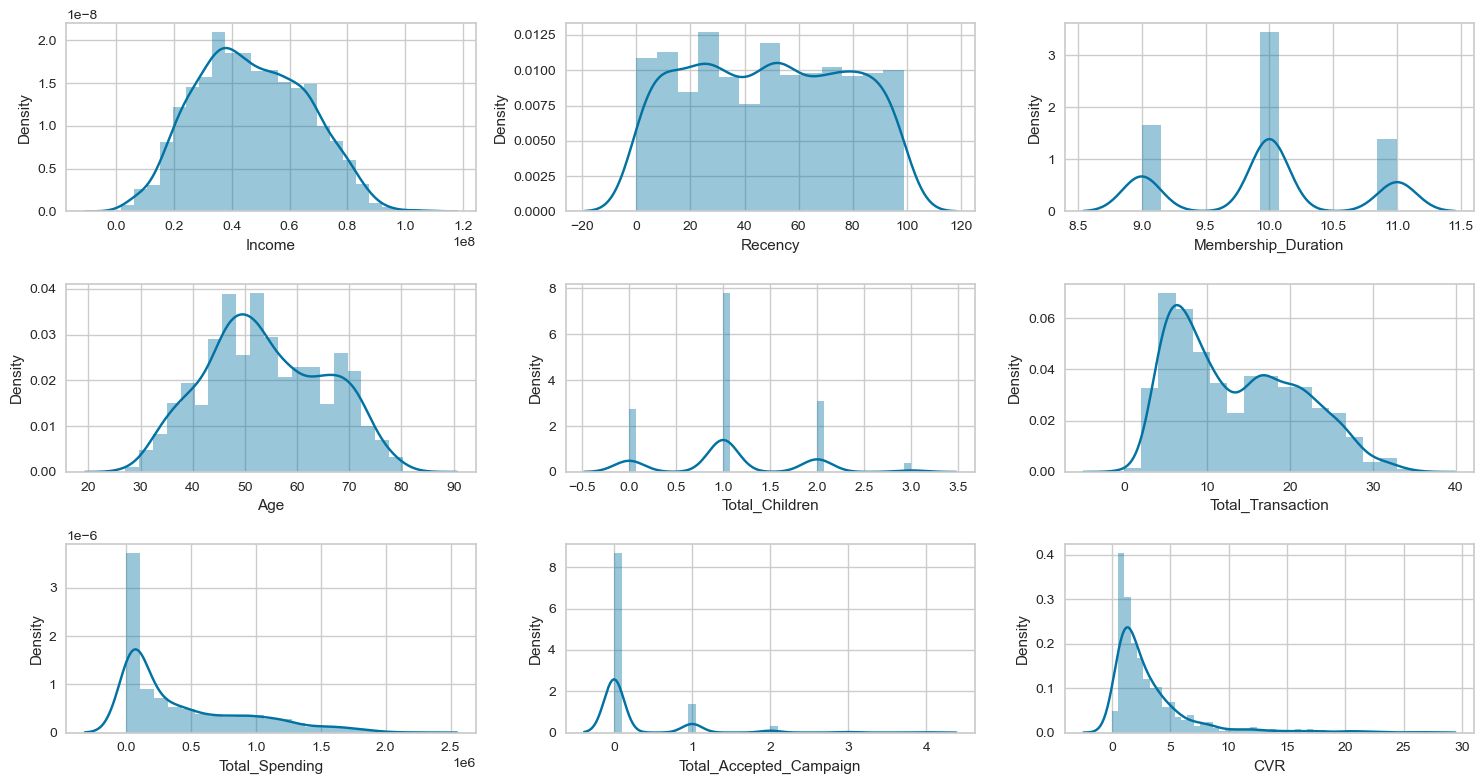

In [38]:
# cek distribusi fitur numerikal
plt.figure(figsize=(15, 8))
for i in range(0, len(n_feats)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df2[n_feats[i]])
    plt.tight_layout()

Dari grafik diatas, dapat dilihat bahwa:
- Distribusi fitur `Income`, `Age`, dan `Recensy` cenderung mendekati distribusi normal
- Distribusi `Total_Transaction`, `Total_Spending` dan `CVR` mederung positively skewed

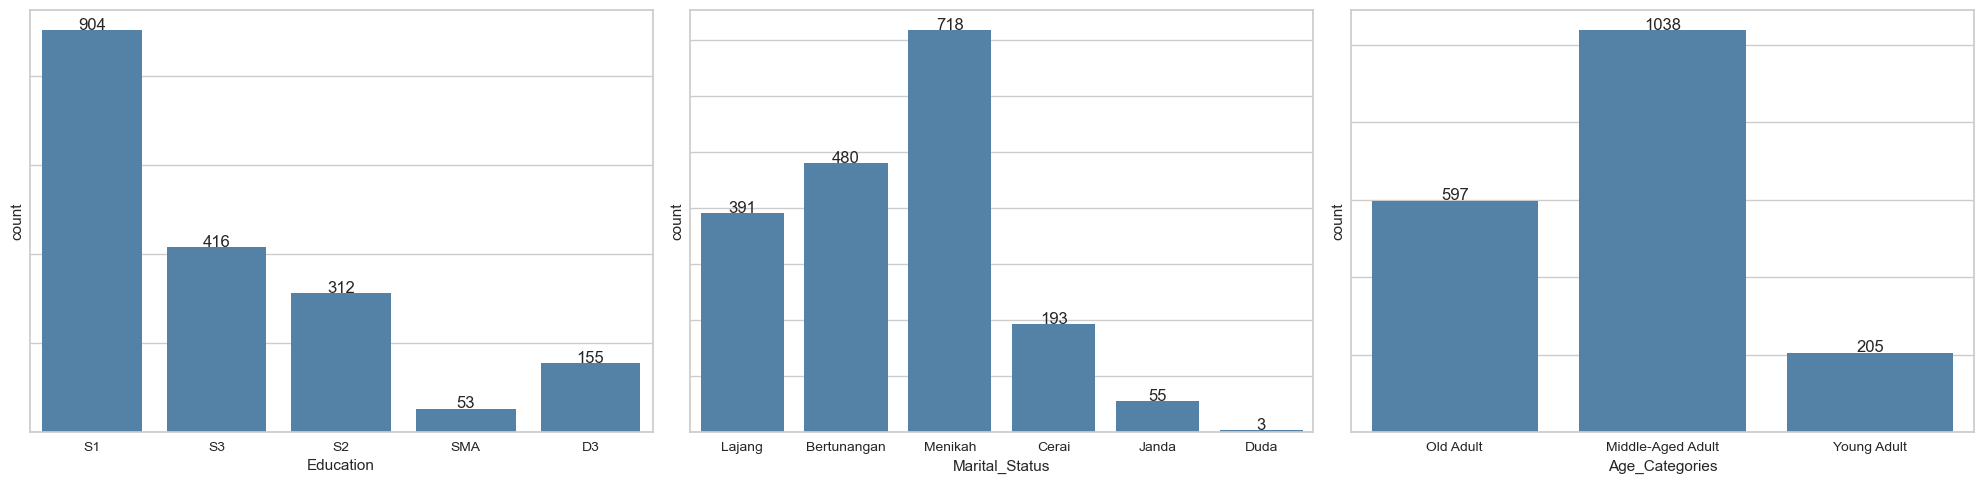

In [39]:
plt.figure(figsize=(20, 5))
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=df2[cats[i]], color='steelblue')
    
    for a in ax.patches:
        txt = np.round(a.get_height())
        anot = txt.astype('int64')
        ax.annotate(anot, (a.get_x()+a.get_width()/2, a.get_height()),
                    ha='center', va='top', xytext=(0, 9), textcoords='offset points')
    plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
    plt.tight_layout()

## Bivariate Analysis

### *Conversion Rate vs Income, Spending, and Age*
Pada tahap ini akan dilakukan analisis mengenai hubungan Conversion Rate dengan income, total spending, dan usia pelanggan.

In [40]:
variable = ['Income', 'Total_Spending', 'Age']

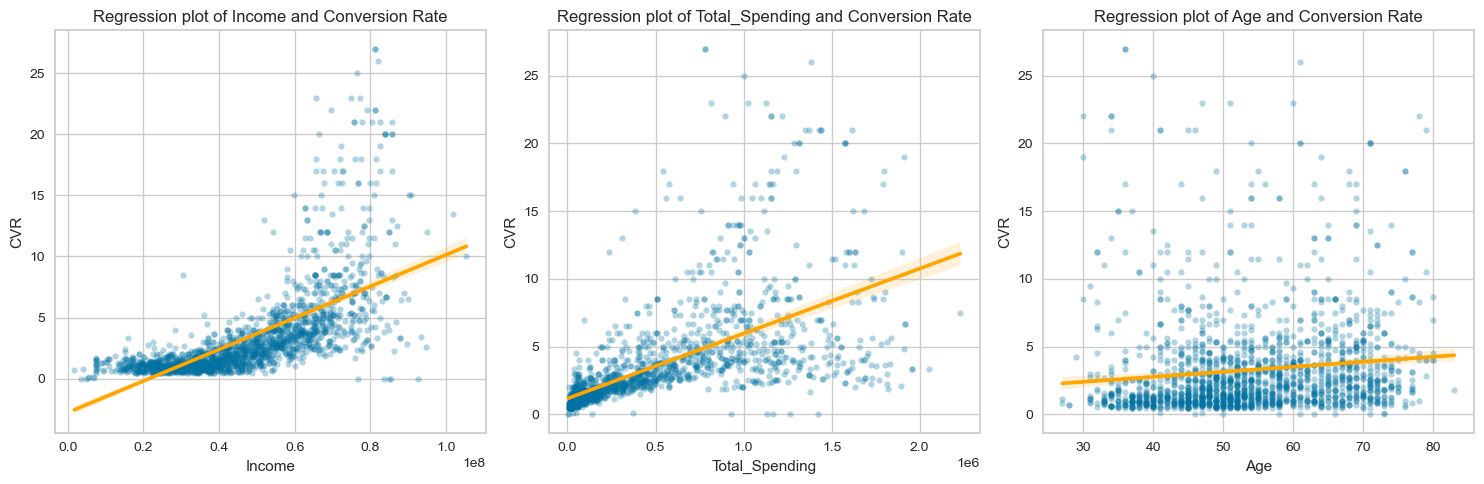

In [41]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df2[variable[var]], y='CVR', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

Dari grafik diatas, gterlihat bahwa:
- Secara kesluruhan pendapatan dan total spending  memiliki korelasi posistif terhadap konversi pembelian. Hal ini berarti semakin tinggi pendapatan dan total spending, kemungkinan konversi atau pembelian dari calon konsumen juga meningkat. 
- Korelasi positif ini dapat disebabkan oleh beberapa faktor, seperti kemampuan finansial yang lebih baik untuk memenuhi kebutuhan atau keinginan pelanggan, serta persepsi nilai yang tinggi terhadap produk atau layanan yang ditawarkan. Dengan demikian, perusahaan dapat memperhatikan dan mengoptimalkan strategi pemasaran mereka dengan mempertimbangkan target audiens dengan pendapatan dan total spending yang lebih tinggi, sehingga meningkatkan peluang konversi dan keberhasilan kampanye pemasaran secara keseluruhan.
- Sementara itu, fitur usia cenderung tidak memiliki korelasi yang signifikan terhadap conversion rate. Ini berarti usia tidak menjadi faktor dominan yang mempengaruhi keputusan konsumen untuk melakukan konversi atau pembelian. 

### *Age, Income, and Spending*

In [42]:
variable = ['Income', 'Total_Spending']

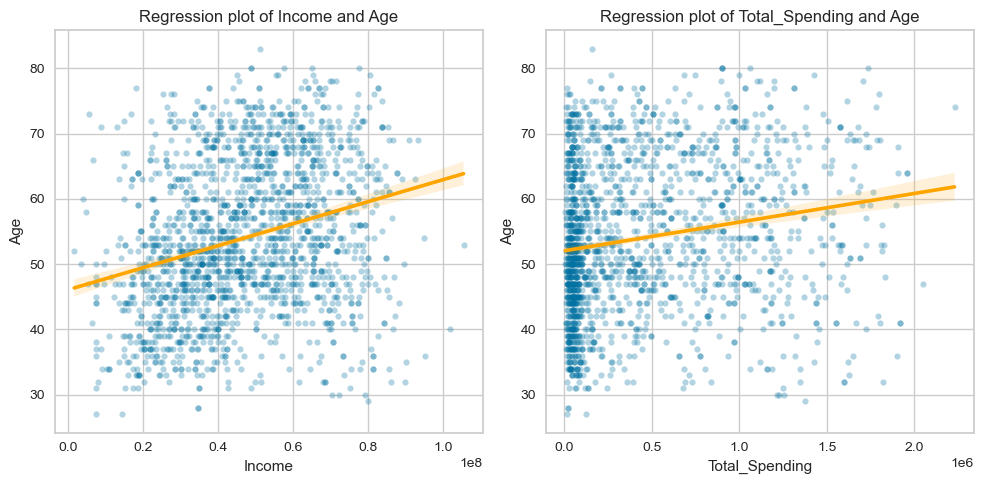

In [43]:
plt.figure(figsize=(10, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 2, var+1)
    sns.regplot(x=df2[variable[var]], y='Age', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Age')
    plt.tight_layout()

Dari grafik tersebut, terlihat bahwa usia memiliki korelasi positif yang lemah bahkan tidak memiliki korelasi yang signifikan terhadap fitur pendapatan (Income) atau total pengeluaran (total spending). Ini berarti bahwa usia tidak secara langsung mempengaruhi tingkat pendapatan atau pola pengeluaran seseorang. Meskipun demikian, perusahaan masih perlu mempertimbangkan faktor usia sebagai bagian dari strategi pemasaran mereka. Meskipun korelasi yang lemah menunjukkan bahwa usia mungkin bukan faktor penentu utama dalam keputusan konsumen.

### *Income and Spending*

[Text(0.5, 1.0, 'Regression plot of Total Spending and Income')]

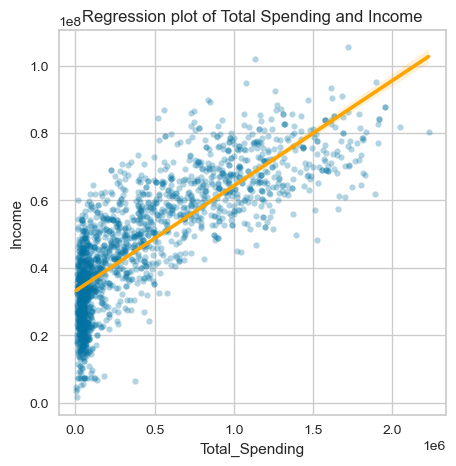

In [44]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Total_Spending', y='Income', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of Total Spending and Income')

Dapat dilihat pada grafik diatas bahwa:
- Income dan total spending memiliki korelasi positif yang kuat.
- Hal ini menunjukkan adanya hubungan yang signifikan antara tingkat pendapatan seseorang dengan pola pengeluaran mereka. Semakin tinggi pendapatan seseorang, kemungkinan besar mereka juga memiliki pengeluaran yang lebih tinggi.

## Multivariate Analysis

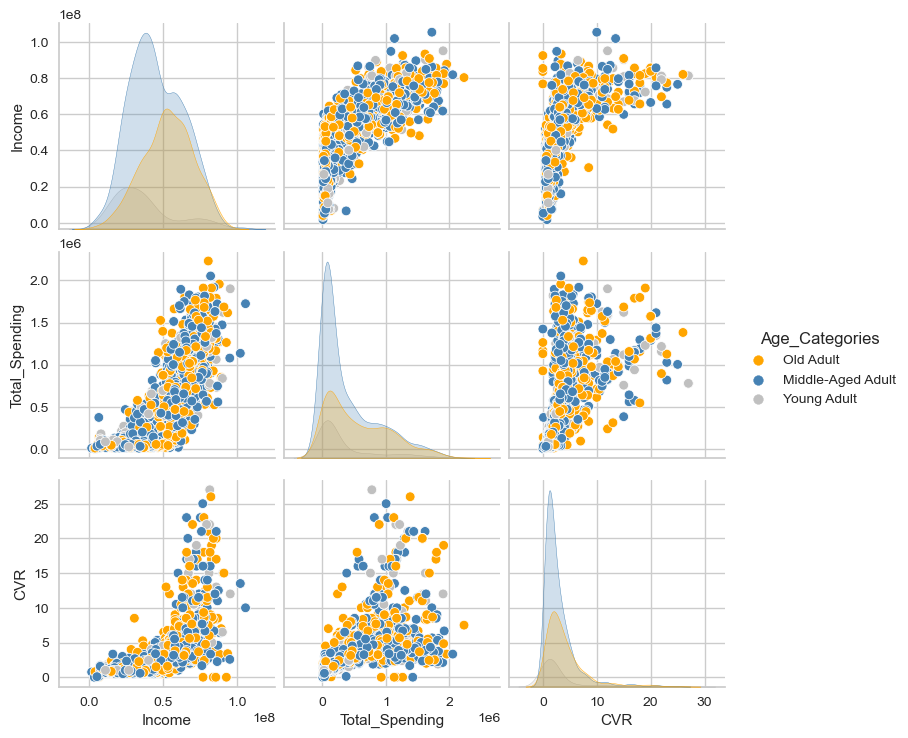

In [45]:
sns.pairplot(df2[['Income', 'Total_Spending', 'Age_Categories', 'CVR']], hue = 'Age_Categories', palette=['orange', 'steelblue','silver'])

Key takeaways:
- Pada analisis pairplot fitur `Income`, `Total_Spending`, dan `CVR` terlihat bahwa tidak ada kelompok usia yang jelas atau pola yang terlihat. 
- Distribusi usia terlihat lebih merata atau tidak terkelompok secara signifikan. Hal ini menunjukkan bahwa usia mungkin tidak menjadi faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi (CVR). Meskipun usia tetap menjadi faktor penting dalam analisis dan strategi pemasaran, namun dalam konteks ini, faktor-faktor lain seperti pendapatan dan pola pengeluaran mungkin memiliki pengaruh yang lebih besar.

# **Data Preprocessing**

In [46]:
df_prep = df2.copy()

## Feature Encoding

- Melakukan encoding untuk fitur-fitur kategorikal 
- `Education`
    - SMA : 0
    - D3 : 1
    - S1 : 3
    - S2 : 4
    - S3 : 5

In [47]:
mapping_education = {'SMA' : 0, 
                     'D3' : 1, 
                     'S1' : 2, 
                     'S2' : 3, 
                     'S3' : 4}

df_prep['education_encd'] = df_prep['Education'].map(mapping_education)

## Standardization
Standardisasi digunakan untuk mengubah skala atau rentang nilai dari fitur-fitur yang digunakan dalam proses clustering. Dalam clustering (k-means), perbedaan skala atau rentang nilai yang signifikan antara fitur dapat mempengaruhi hasil clustering. Dengan melakukan standardisasi, fitur-fitur akan memiliki mean (rata-rata) yang mendekati 0 dan deviasi standar yang mendekati 1. Dengan demikian, standardisasi memastikan bahwa setiap fitur memiliki kontribusi yang seimbang dalam proses clustering.

In [48]:
df_s = df_prep.copy()

In [49]:
X = df_s.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Categories', 'Dt_Customer'])

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [51]:
X.head(3)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_Revenue,Response,Membership_Duration,Age,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaign,CVR,education_encd
0,-0.032256,0.876749,0.809803,-0.365148,-0.760019,-0.550891,-0.733803,-0.552627,-0.679909,-0.666071,...,0.0,-0.377964,-1.400057,1.308689,1.283647,-1.021472,-0.867301,-0.401435,-0.570350,-0.469878
1,1.321897,-0.950225,-1.022962,-0.780333,0.551282,1.078317,0.235689,2.018054,0.421110,0.119971,...,0.0,-0.377964,0.061148,0.349991,-1.501624,1.000954,0.699405,-0.401435,0.536465,-0.469878
2,-1.087862,0.876749,-1.022962,-0.780333,-0.760019,-0.449065,-0.621630,-0.363953,-0.569807,-0.687905,...,0.0,-0.377964,-1.400057,-1.305942,-0.108989,-0.751815,-0.812916,-0.401435,-0.534823,-0.469878


# **Modeling**

In [52]:
df_model = X.copy()

## PCA
Dilakukan untuk mengurangi dimensi data dengan mempertahankan informasi yang signifikan. 

In [53]:
from sklearn.decomposition import PCA 

# fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# pca transformed 
data_pca = pca.transform(df_model)

In [54]:
data_pca1 = pd.DataFrame(data_pca)

## Finding the Best Cluster

In [55]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(data_pca1)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

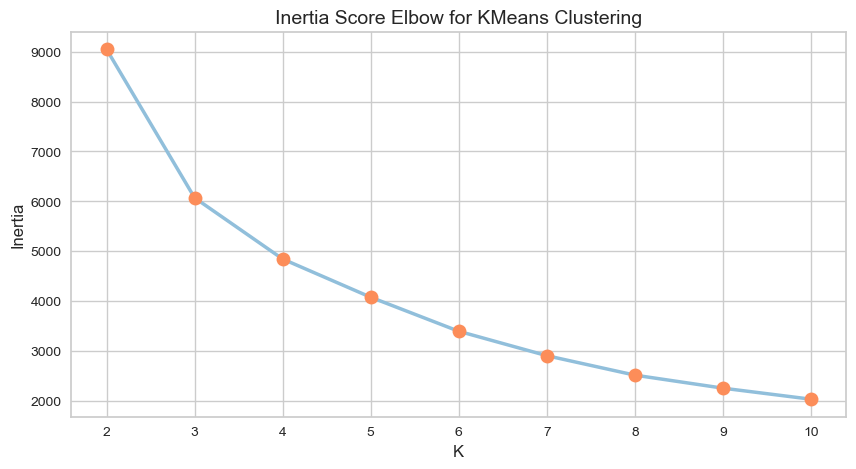

In [56]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

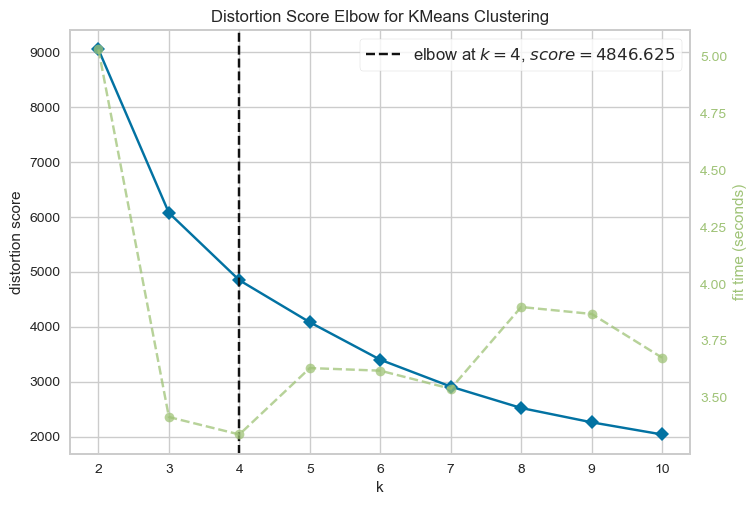

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(data_pca1)       
visualizer.show() 

Berdasarkan Distortion Score dan Elbow methode didapatkan jumlah cluster terbaik adalah 4

## Clustering with _K-Means_

In [58]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [59]:
data_pca1.sample(5)

,0,1,cluster
1664,3.725960,2.540145,3
1405,3.065615,-1.789070,1
514,-2.546194,-0.339797,0
596,-3.266596,-0.803120,0
1263,3.096119,0.687485,3


## Visualisasi Hasi Segmentasi

Text(0.5, 1.0, 'Cluster Segementation')

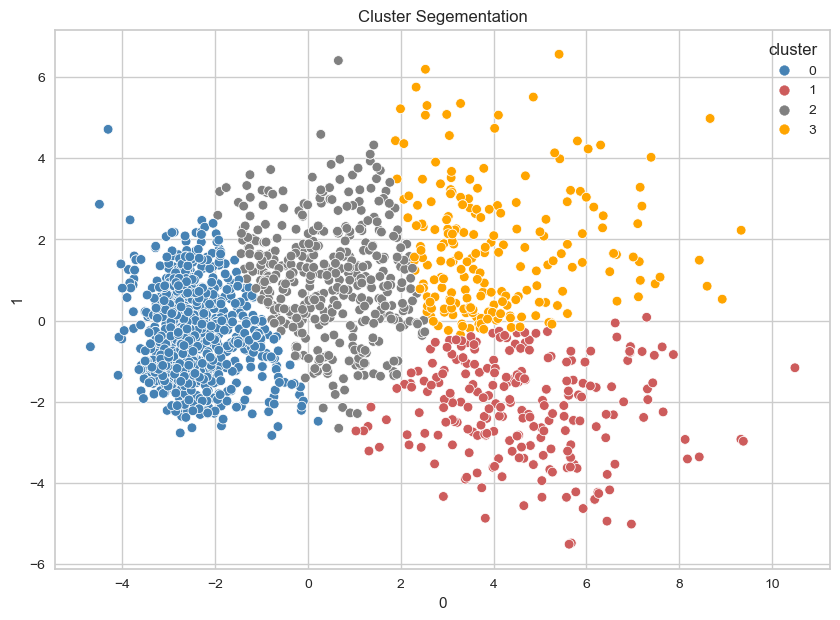

In [60]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette=color)
plt.title('Cluster Segementation')

## Evaluation

In [61]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

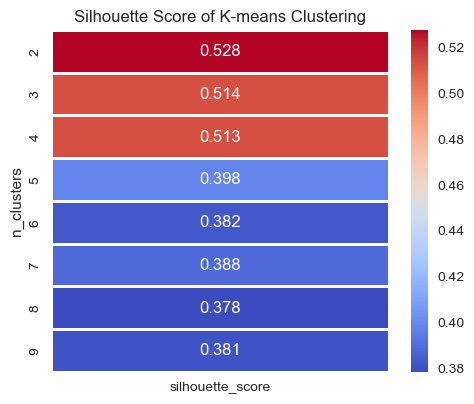

In [62]:
# Change the column names of data_pca1 to strings
data_pca1.columns = data_pca1.columns.astype(str)

visualize_silhouette_layer(data_pca1)

Key takeaways:
- Berdasarkan Silhouette Score, jumlah cluster terbaik yang direkomendasikan adalah 4. 
- Nilai Silhouette Score pada jumlah cluster tersebut lebih tinggi dibandingkan dengan jumlah cluster lainnya, menandakan kualitas clustering yang lebih baik.

# **Customer Personality Analysis for Marketing Retargeting**

In [63]:
df_prep['Cluster'] = kmeans.labels_

## Summary
Analisis statistik berdasarkan hasil cluster

In [64]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income', 'CVR','Cluster', 'Age']
data_summary = df_prep[feats]

In [65]:
round(data_summary.groupby('Cluster').agg(['median']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,CVR,Age
,median,median,median,median,median,median
Cluster,,,,,,
0,49.0,7.0,58000.0,33297500.0,1.0,50.0
1,49.0,20.0,1040000.0,71488000.0,8.0,54.0
2,48.0,17.0,434000.0,52597000.0,3.0,58.0
3,49.0,25.0,1116000.0,65215000.0,4.0,60.0


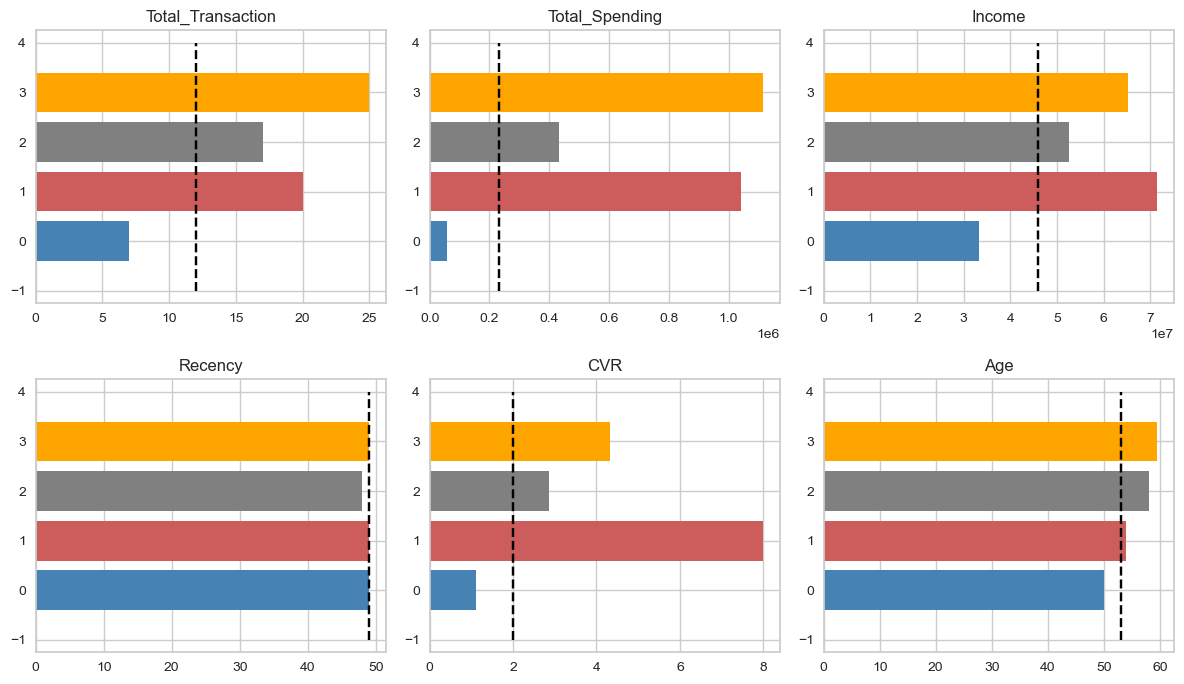

In [66]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df_prep[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df_prep.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=color) 
        plt.title(col)
        i = i + 1

dist_list(['Total_Transaction','Total_Spending', 'Income', 'Recency', 'CVR', 'Age'])
plt.tight_layout()
plt.show()


Berdasarkan hasil clustering dapat diketahui karakteristik dari setiap segment cluster sebagai berikut.
| Nama Cluster |                 Angka Transaksi dan Spending                |                  Pendapatan                 | _Conversion Rate_ |        Usia        |
|:------------:|:-----------------------------------------------------------:|:-------------------------------------------:|:-----------------:|:------------------:|
|   Cluster 0  |   Tertinggi, mayoritas 25 transaksi dan Rp.1.116.000/bulan  | Cukup tinggi, mayoritas Rp.65.215.000/tahun |     Sedang, 4%    | Mayoritas 60 tahun |
|   Cluster 1  |  Terendah, mayoritas hanya 7 transaksi dan Rp.58.000/bulan  |   Terendah, mayoritas Rp.33.297.500/tahun   |    Terendah, 1%   | Mayoritas 50 tahun |
|   Cluster 2  | Cukup tinggi, mayoritas 20 transaksi dan Rp.1.040.000/bulan |   Tertinggi, mayoritas Rp.71.488.000/tahun  |   Tertinggi, 8%   | Mayoritas 54 tahun |
|   Cluster 3  |     Sedang, mayoritas 17 transaksi dan Rp.434.000/bulan     | Cukup sedang, mayoritas Rp.52.597.000/tahun |  Cukup sedang, 3% | Mayoritas 58 tahun |

Dari karakteriktik tersebut, dapat setiap cluster dapat dikelompok berdasarkan kategori, yaitu sebagai berikut.
| Nama Cluster |                 Jenis Kategori                 |   Nama Kategori   |
|:------------:|:----------------------------------------------:|:-----------------:|
|   Cluster 0  |     _High-Transaction High-Spending Group_     |  High Customer A  |
|   Cluster 1  |      _Low-Transaction Low-Spending Group_      |    Low Customer   |
|   Cluster 2  |       _High-Income High-Conversion Group_      |  High Customer B  |
|   Cluster 3  | _Moderate-Transaction Moderate-Spending Group_ | Moderate Customer |

## Percentage

In [67]:
# persentase total customer setiap cluster
cluster_count = data_summary['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,924,50.22
1,1,247,13.42
2,2,437,23.75
3,3,232,12.61


([<matplotlib.axis.XTick at 0x1f673b7cf10>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

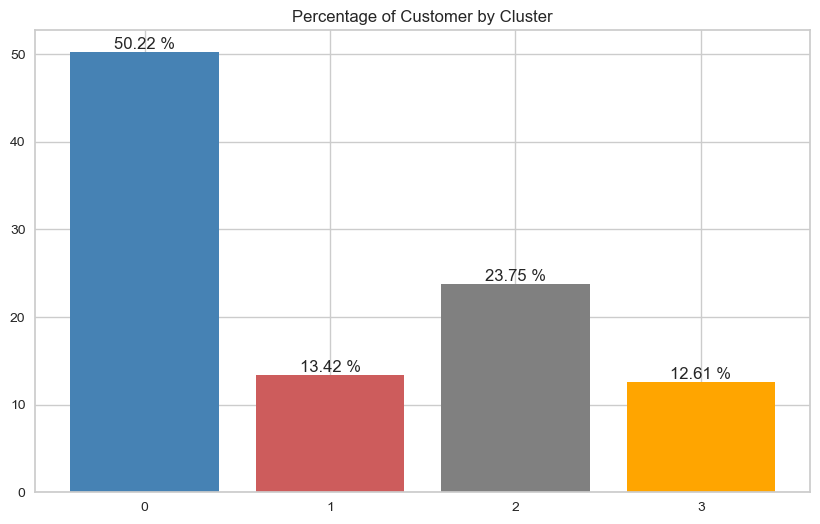

In [68]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

bars = plt.bar(x=cluster_count['Cluster'], height= cluster_count['percentage (%)'], color=color)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height} %', ha='center',va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(range(0,4))

Berdasarkan hasil analisis, ditemukan bahwa sekitar 50% dari populasi termasuk dalam kelompok Low Customer. Meskipun kelompok ini memiliki angka transaksi dan pengeluaran yang rendah, namun karena populasi mereka yang besar, perusahaan dapat fokus untuk menarik perhatian mereka.<br>
<br>
Sedangkan populasi High Customer A dan B cenderung rendah, namun memiliki potensi transaksi, spending, konversi, dan income yang tinggi. Perusahaan dapat mempertimbangkan strategi pemasaran yang lebih personal dan eksklusif untuk menarik minat mereka.

## Univariate Analysis
Univariate analisis ini dilakukan untuk mengetahui distribusi fitur berdasarkan cluster

In [69]:
variable = [ 'Recency', 'Total_Transaction', 'Total_Spending', 'Income', 'NumWebVisitsMonth', 'Total_Accepted_Campaign', 'CVR', 'Membership_Duration', 
            'Age', 'education_encd']

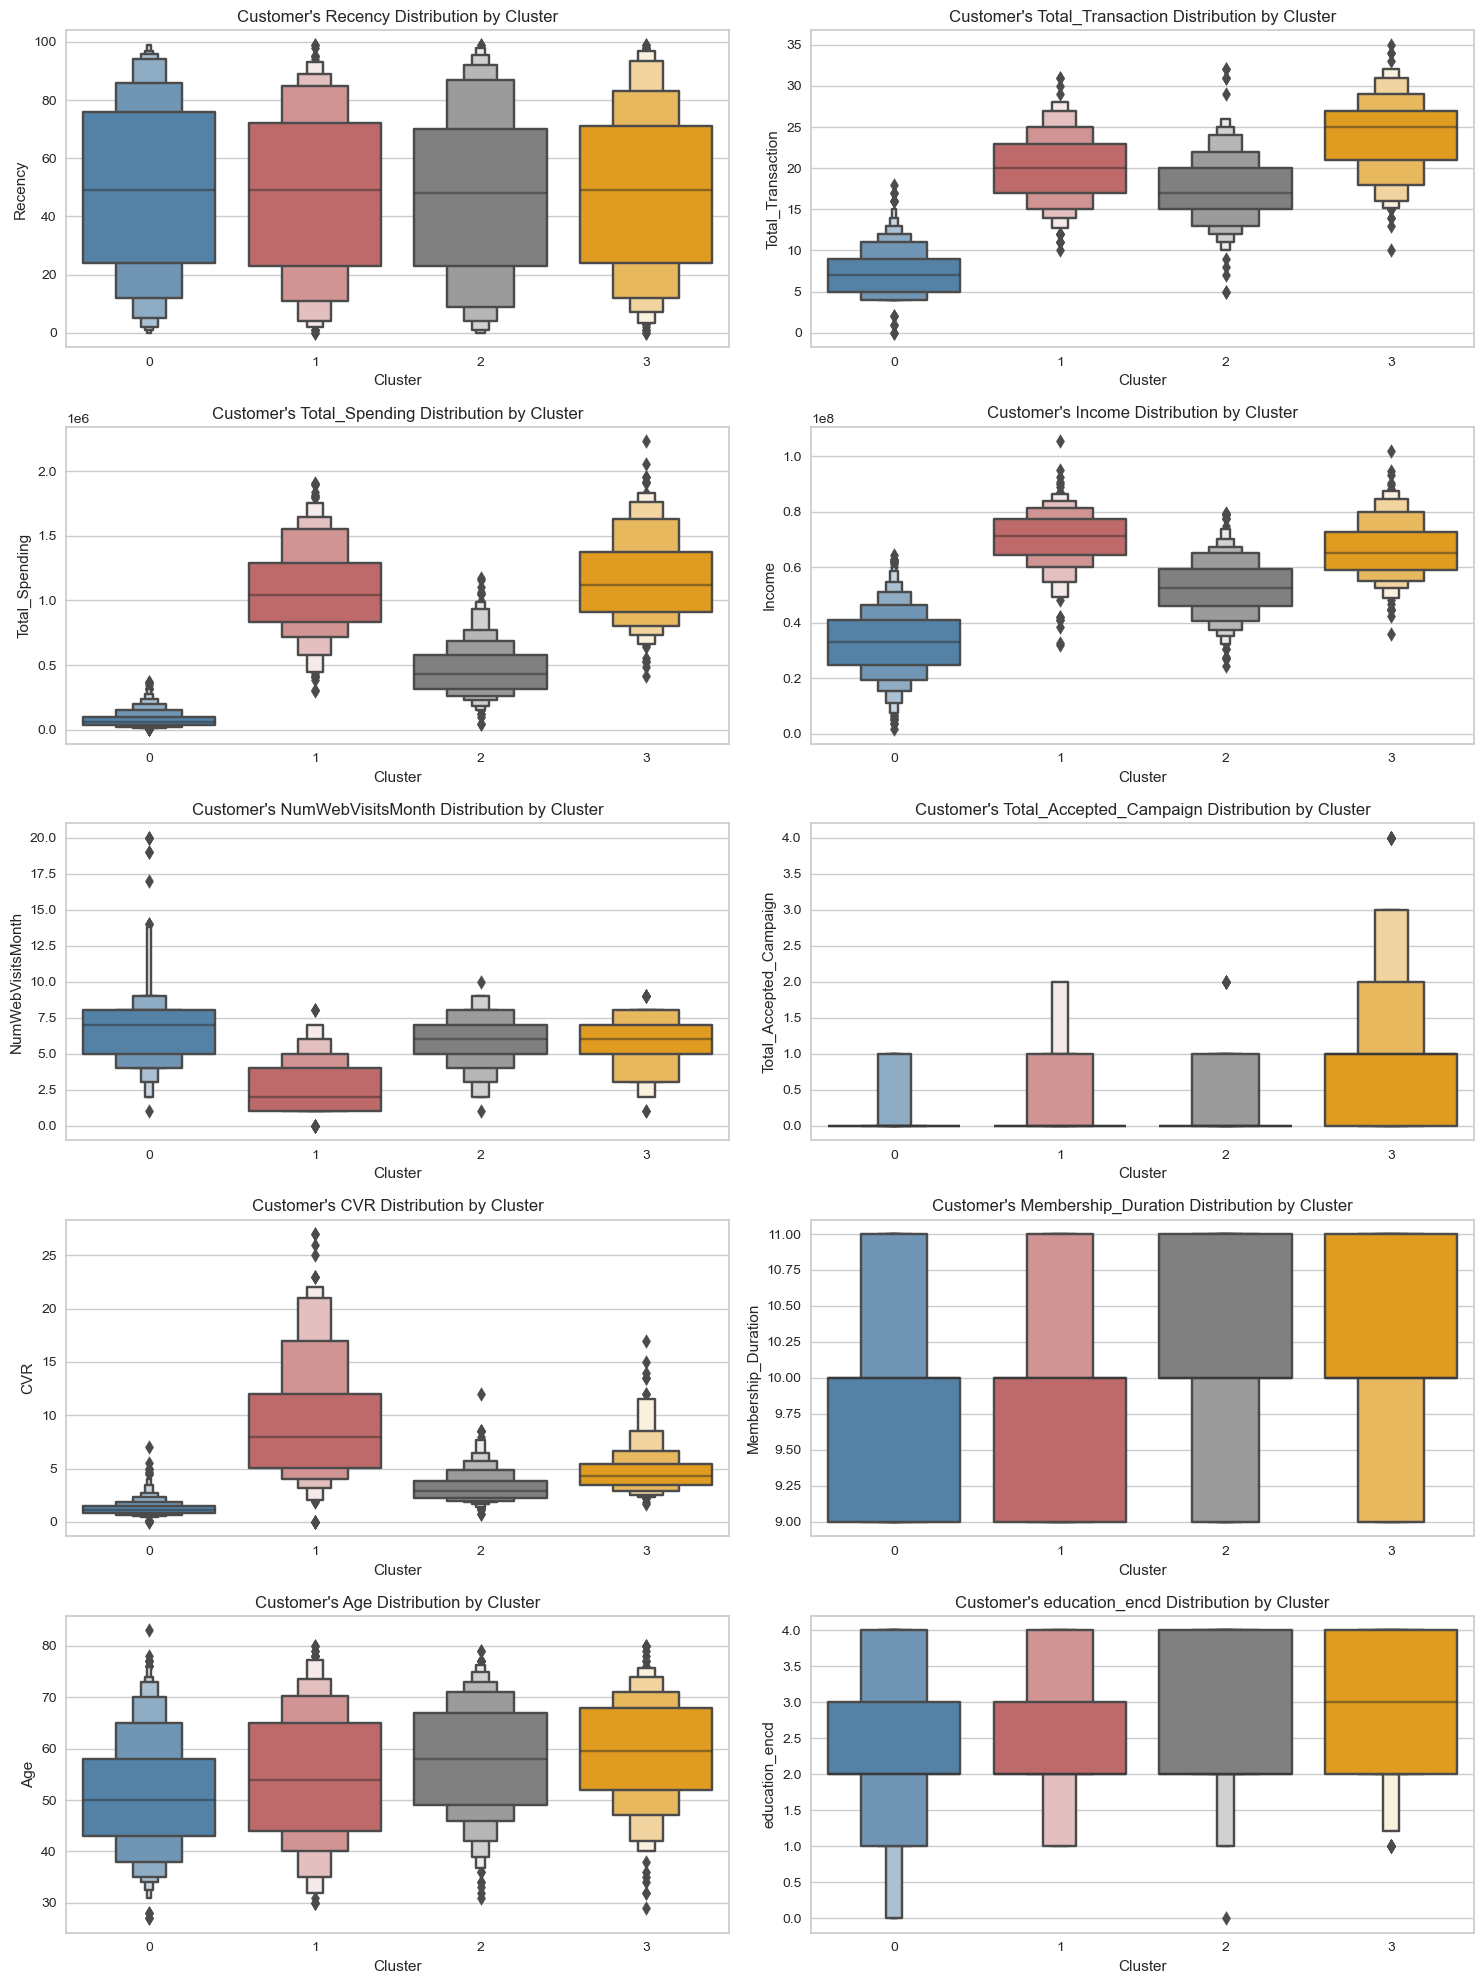

In [70]:
# distribusi cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=df_prep[variable[i]], data=df_prep, palette=color).set(title=f'Customer\'s {variable[i]} Distribution by Cluster')
    plt.tight_layout()

- Hal yang menarik adalah adanya kategori Low Customer atau Cluster 1 yang memiliki distribusi jumlah kunjungan website yang tinggi, namun memiliki total acceptance campaign yang rendah. Ini menunjukkan bahwa kelompok ini sangat sering mengunjungi website perusahaan, tetapi tidak sepenuhnya menyadari atau tidak responsif terhadap campaign yang ditawarkan. Mengingat kelompok ini memiliki populasi yang paling banyak, perusahaan perlu mengembangkan strategi yang tepat untuk menarik perhatian dan meningkatkan keterlibatan mereka. Mungkin perlu dilakukan analisis lebih lanjut untuk memahami alasan di balik rendahnya acceptance campaign dalam kelompok ini. 
- Cluster yang paling banyak merespon campaign adalah High Customer A atau Cluster 0 dengan tingkat konversi yang sedang. Ini menunjukkan bahwa mayoritas pelanggan dalam kelompok ini sangat responsif terhadap campaign yang ditawarkan oleh perusahaan. Hal ini dapat menjadi kesempatan yang baik untuk meningkatkan interaksi dan pembelian dari kelompok ini dengan meluncurkan campaign yang lebih menarik dan relevan sesuai dengan preferensi mereka.
- Sementara itu, High Spender B atau Cluster 2 menarik perhatian karena mayoritas pelanggannya tidak terlalu sering mengunjungi website perusahaan, namun memiliki distribusi konversi rate yang lebih tinggi dengan respon campaign yang tidak terlalu tinngi. Fenomena ini menunjukkan bahwa kelompok ini memiliki kecenderungan pengeluaran yang tinggi dan cenderung merespons positif terhadap kampanye yang ditawarkan, meskipun mereka tidak begitu aktif dalam kunjungan ke website. Perusahaan dapat memanfaatkan informasi ini dengan mengoptimalkan saluran komunikasi lain seperti email, media sosial, atau platform online lainnya untuk efektif menjangkau kelompok ini.

## Multivariate Analysis

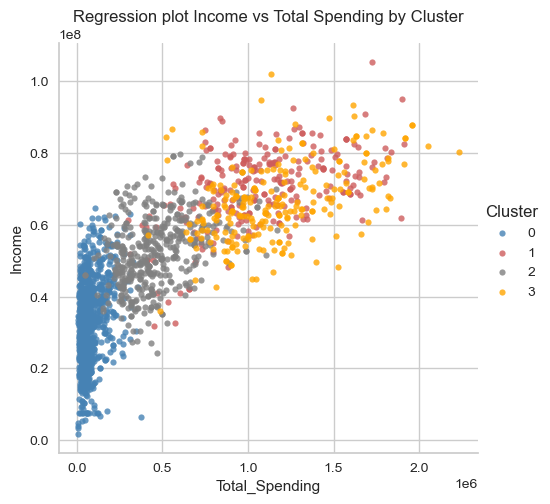

In [71]:
sns.lmplot(y='Income', x='Total_Spending', hue='Cluster', fit_reg=False, data=df_prep, palette=color, scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

Berdasarkan plot korelasi antara pendapatan (Income) dan total pengeluaran (Total Spending), terlihat bahwa terbentuknya cluster atau kelompok yang dapat dibedakan. Terlihat bahwa High cluster 0 dan 3 cenderung berada dalam satu kelompok, yaitu dalam kategori high customer. Hal ini menunjukkan adanya hubungan positif antara tingkat pendapatan dan pengeluaran pelanggan dalam kelompok tersebut. Dengan mengetahui pola korelasi ini, perusahaan dapat mengoptimalkan strategi pemasaran dan penawaran produk mereka. 

Berdasarkan analisis yang telah dilakukan, kita dapat mengidentifikasi personalitas atau karakteristik pelanggan berdasarkan kluster yang terbentuk. Mengetahui personalitas ini sangat berharga dalam merancang strategi pemasaran yang lebih efektif. Dengan memahami preferensi, kebutuhan, dan perilaku konsumen dalam setiap kluster, perusahaan dapat menghasilkan kampanye yang lebih relevan dan menarik bagi setiap kelompok pelanggan.

#### High Customer A
---
Personaliti:
- Populasi 12.61%.
- Cluster 0 yang merupakan pelanggan yang memiliki total taransaksi dan total spending yang tinggi tertinggi.
- Paling responsif terhadap campaign, dengan konversi ke pembelian sedang.
- Tingkat kunjungan website sedang.

Rekomendasi:
- Mengingat kelompok High Customer A cenderung memiliki total transaksi dan total spending yang tinggi, perusahaan dapat memberikan penawaran khusus dan insentif tambahan untuk mendorong pelanggan melakukan pembelian secara terus-menerus. Perusahaan dapat menerapkan program diskon eksklusif, hadiah loyalitas, atau akses ke produk atau layanan khusus untuk kelompok ini.
- Perusahaan dapat meningkatkan kualitas pengalaman pengguna dalam berselancar di website, mengingat tingkat kunjungan website yang sedang. Perusahaan dapat memastikan tampilan yang menarik, customer journey yang efisien, dan lain sebagainya.
- Mengingat kelompok High Customer A sangat responsif terhadap campaign, memanfaatkan kepuasan mereka dengan memperkenalkan program referral dapat menjadi strategi yang efektif. Memberikan insentif kepada pelanggan untuk merekomendasikan produk atau layanan perusahaan kepada teman dan keluarga dapat membantu dalam memperluas jangkauan dan memperoleh pelanggan baru.
- Perusaan dapat mingirimkan pesan yang dipersonalisasisan seperti info promo atau diskon berdasarkan preferensi kelompok ini. Hal ini dilakukan untuk menjaga loyalitas pelanggan. <br>
<br>


#### High Customer B
---
Personaliti :
- Populasi 13.42%.
- Sama seperti Cluster 0, namun kategori ini termasuk Cluster 2 yang merupakan pelanggan yang memiliki income paling tinggi.
- Tingkat konversi paling tinggi, respon terhadap campaign relatif sedang.
- Kurang mengunjungi website secara aktif. 

Rekomendasi:
- Sama halnya dengan High Customer A, perusahaan dapat memberikan penawaran khusus seperti diskon, program loyalti, dan sebagainya agar pelanggan selalu tertarik untuk berbelanja terus menerus.
- Mengingat kelompok ini kurang aktif dalam kunjungan website, perusahaan dapat memanfaatkan saluran komunikasi alternatif seperti email, pesan teks, atau media sosial. Hal ini dapat membantu meningkatkan interaksi dan kesadaran pelanggan.
- Untuk meningkatkan respon pelanggan terhadap campaign, perusahaan dapat memberikan campaign-campaign yang tertarget sesuai dengan preverensi dan kebutuhan pelanggan.
- Mengingat pelanggan dalam kelompok High Customer B memiliki tingkat konversi yang tinggi, perusahaan dapat mempertimbangkan untuk meluncurkan program loyalitas yang memberikan insentif tambahan, penghargaan khusus, atau akses ke acara atau produk eksklusif dapat memperkuat loyalitas pelanggan. <br>
<br>

#### Moderate Customer
---
Personaliti :
- Populasi 23.75%.
- Termasuk kedalam cluster 4 yang memiliki total transaksi, total spending, dan income sedang atau rata-rata.
- Tingkat konversi, kunjungan website dan respon terhadap campaign relatif sedang.

Rekomendasi:
- Perusahaan dapat memberikan penawaran khusus dan diskon untuk mendorong pembelian lebih lanjut. Hal ini dapat memberikan insentif tambahan kepada pelanggan dalam kelompok ini untuk memilih produk atau layanan perusahaan dibandingkan dengan pesaing.
- Perusahaan dapat mengirim pesan yang relevan dan menarik kepada pelanggan.
- Memastikan pengalaman pengguna yang baik saat mengunjungi website atau berinteraksi dengan produk atau layanan perusahaan.
- Membangun program hadiah atau loyalitas dapat membantu memperkuat keterikatan pelanggan. Seperti dengan memberikan poin, penghargaan, atau manfaat khusus kepada pelanggan setia, perusahaan dapat mendorong mereka untuk terus memilih dan membeli produk atau layanan perusahaan. <br>
<br>


#### Low Customer
---
Personaliti :
- Populasi 50.22%, didominasi oleh customer kategori ini.
- Termasuk kedalam cluster 1 yang memiliki total transaksi, total spending, dan income rendah.
- Tingkat konversi paling rendah, cenderung tidak merespon campaign.
- Namun kategori ini paling sering mengunjungi website.

Rekomendasi:
- Mengingat kelompok Low Customer sering mengunjungi website, perusahaan dapat memanfaatkan informasi kunjungan website untuk menyajikan konten yang personalisasi dan penawaran khusus yang sesuai dengan minat dan preferensi mereka.
- Perusahaan dapat melakukan retargeting campaign dengan mengingatkan pelanggan dalam kelompok ini tentang produk atau layanan yang mereka telah kunjungi di website. Dengan menampilkan iklan yang disesuaikan di berbagai platform digital yang mereka gunakan, perusahaan dapat membangun kesadaran dan mendorong mereka untuk melanjutkan proses pembelian.
- Mengingat kelompok Low Customer memiliki tingkat konversi yang rendah dan cenderung tidak merespon campaign dengan baik, perusahaan dapat menggunakan strategi konten yang lebih fokus pada edukasi dan informasi. Memberikan konten yang memberikan nilai tambah, memberikan solusi untuk masalah atau kebutuhan pelanggan, dan membantu mereka membuat keputusan yang lebih informasi dapat meningkatkan keterlibatan dan kepercayaan pelanggan dalam kelompok ini.